___AE3___

Datasets: https://www.kaggle.com/datasets/vivovinco/league-of-legends-stats-s13/data

Introduction: League of Legends (LoL) is a popular multiplayer online battle arena (MOBA) game developed by Riot Games in 2009. Since then it has become one of the most popular online video games boasting an average of over 150 million monthly players. Players control champions with unique abilities, working together to destroy the enemy team's base in matches that typically last 20 to 50 minutes. With a focus on strategy, teamwork, and skill, LoL boasts a massive player base and a thriving esports scene.

The goal of this presentation is to analyze a champion's data to see which attributes of a champion make the objectively best champion for players to win with.

In [123]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

___Cleaning Data___

In [124]:
def clean_csv(csv):
    """
    Function to split the column headers into seperate columns
    :param csv: The csv file
    :return: A pandas DataFrame with seperated columns
    """
    
    stats_df = pd.read_csv(csv)
    stats_df = stats_df['Name;Class;Role;Tier;Score;Trend;Win %;Role %;Pick %;Ban %;KDA'].str.split(';', expand = True)
    stats_df.columns = ['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %', 'KDA']
    
    stats_df = pd.DataFrame(stats_df)
    #Lowercase the class and role
    stats_df['Class'] = stats_df['Class'].str.lower()
    stats_df['Role'] = stats_df['Role'].str.lower()
    #Remove the % symbol and convert each string to a number
    stats_df['Win %'] = pd.to_numeric(stats_df['Win %'].str.strip('%'))
    stats_df['Role %'] = pd.to_numeric(stats_df['Role %'].str.strip('%'))
    stats_df['Pick %'] = pd.to_numeric(stats_df['Pick %'].str.strip('%'))
    stats_df['Ban %'] = pd.to_numeric(stats_df['Ban %'].str.strip('%'))
    stats_df['Score'] = pd.to_numeric(stats_df['Score'])
    stats_df['Trend'] = pd.to_numeric(stats_df['Trend'])
    stats_df['KDA'] = pd.to_numeric(stats_df['KDA'])
    return stats_df

__Column Descriptions__
Name : Name of the champion
Class : Fighter, Assassin, Mage, Marksman, Support or Tank
Role : Top, Mid, ADC, Support or Jungle
Tier : God, S, A, B, C or D
Score : Overall score of the champion
Trend : Trend of the score
Win % : Win rate of the champion
Role % : Role rate played with the champion
Pick % : Pick rate of the champion
Ban % : Ban rate of the champion
KDA : (Kill+Death)/Assist ratio of the champion

In [125]:
stats_1_df = clean_csv("League of Legends Champion Stats 13.1.csv")
stats_1_df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,fighter,top,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,Ahri,mage,mid,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,Akali,assassin,mid,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37
3,Akali,assassin,top,C,39.63,-1.51,45.92,23.50,2.55,13.02,2.00
4,Akshan,marksman,mid,A,49.39,0.34,51.62,66.03,2.75,3.79,2.26
...,...,...,...,...,...,...,...,...,...,...,...
239,Zilean,support,mid,A,51.52,-3.47,53.33,15.52,0.49,1.40,3.59
240,Zilean,support,support,A,48.35,-2.49,50.95,79.72,2.67,1.40,3.11
241,Zoe,mage,mid,A,48.46,2.43,49.14,87.85,3.45,1.45,2.60
242,Zoe,mage,support,D,28.33,-3.55,47.73,10.03,0.37,1.45,2.14


In [126]:
#Each csv file represents a new patch
#Clean each csv file and convert to a Dataframe
stats_3_df = clean_csv("League of Legends Champion Stats 13.3.csv")
stats_4_df = clean_csv("League of Legends Champion Stats 13.4.csv")
stats_5_df = clean_csv("League of Legends Champion Stats 13.5.csv")
stats_6_df = clean_csv("League of Legends Champion Stats 13.6.csv")
stats_7_df = clean_csv("League of Legends Champion Stats 13.7.csv")
stats_8_df = clean_csv("League of Legends Champion Stats 13.8.csv")
stats_9_df = clean_csv("League of Legends Champion Stats 13.9.csv")
stats_10_df = clean_csv("League of Legends Champion Stats 13.10.csv")
stats_11_df = clean_csv("League of Legends Champion Stats 13.11.csv")
stats_12_df = clean_csv("League of Legends Champion Stats 13.12.csv")
stats_13_df = clean_csv("League of Legends Champion Stats 13.13.csv")

In [127]:
#Create a new column with the patch number to prepare for combining dataframes
stats_1_df['Patch'] = '13.1'
stats_3_df['Patch'] = '13.3'
stats_4_df['Patch'] = '13.4'
stats_5_df['Patch'] = '13.5'
stats_6_df['Patch'] = '13.6'
stats_7_df['Patch'] = '13.7'
stats_8_df['Patch'] = '13.8'
stats_9_df['Patch'] = '13.9'
stats_10_df['Patch'] = '13.10'
stats_11_df['Patch'] = '13.11'
stats_12_df['Patch'] = '13.12'
stats_13_df['Patch'] = '13.13'

In [128]:
#Create a new list consisting of all the dataframes
stats_df_list = [stats_1_df, stats_3_df, stats_4_df, stats_5_df, stats_6_df, stats_7_df, stats_8_df, stats_9_df, stats_10_df, stats_11_df, stats_12_df, stats_13_df]

In [129]:
#Combine all the Data frames into one big dataframe
combined_stats_df = pd.concat(stats_df_list, axis=0, ignore_index=True)
combined_stats_df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA,Patch
0,Aatrox,fighter,top,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77,13.1
1,Ahri,mage,mid,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58,13.1
2,Akali,assassin,mid,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37,13.1
3,Akali,assassin,top,C,39.63,-1.51,45.92,23.50,2.55,13.02,2.00,13.1
4,Akshan,marksman,mid,A,49.39,0.34,51.62,66.03,2.75,3.79,2.26,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Zilean,support,mid,A,52.02,4.90,53.91,13.72,0.31,0.76,3.52,13.13
2923,Zilean,support,support,B,45.21,1.15,50.12,82.08,2.11,0.76,3.03,13.13
2924,Zoe,mage,mid,A,49.82,1.34,50.44,86.34,2.98,1.93,2.60,13.13
2925,Zoe,mage,support,D,32.21,-1.45,48.67,11.43,0.40,1.97,2.11,13.13


___Analyzing Data___

In [130]:
def class_data(df):
    """
    Function to find the data and scores per class
    :param df: Cleaned DataFrame
    :return: DataFrame with scores per class
    """
    class_data_df = df.copy().drop(['Name', 'Role', 'Tier', 'Patch'], axis = 1)
    class_data_df = class_data_df.groupby('Class').mean().reset_index()
    return class_data_df

In [131]:
class_data(stats_1_df)

,Class,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,assassin,51.660000,-0.940769,48.855769,65.906923,4.482308,10.388846,2.379615
1,fighter,49.612329,-1.724932,50.236301,58.340685,3.542877,6.091370,2.149315
2,mage,47.648333,0.786167,50.430167,54.259333,2.939667,3.794167,2.427833
3,marksman,50.615278,-2.601111,50.204444,72.641389,6.414167,4.893889,2.268889
4,support,53.593158,-2.244211,50.160000,81.144737,4.390526,3.437368,2.939474
5,tank,51.195333,2.468667,51.085333,61.710000,3.189000,5.100667,2.553667


In [132]:
def role_data(df):
    """
    Function to find the data and scores per role
    :param df: Cleaned DataFrame
    :return: DataFrame with scores for each role
    """
    #Drop unnecessary columns
    role_data_df = df.copy().drop(['Name', 'Class', 'Tier', 'Patch'], axis = 1)
    #Group by role
    role_data_df = role_data_df.groupby('Role').mean().reset_index()
    return role_data_df

In [133]:
role_data(stats_1_df)

,Role,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,adc,50.000000,-1.678077,50.582692,75.500000,7.502692,5.849615,2.373462
1,jungle,50.000000,-0.655102,49.805102,70.331020,4.007755,6.593673,2.665510
2,mid,49.999844,0.183125,50.661406,52.772031,2.930000,4.786719,2.427344
3,support,50.000652,-1.782174,50.001739,65.243261,4.157609,5.149130,2.498478
4,top,50.000339,-0.329492,50.140000,58.446271,3.242881,5.399153,1.965763


In [134]:
def tier_data(df):
    """
    Function to find the data and scores per tier
    :param df: Cleaned DataFrame
    :return: DataFrame with scores for each tier
    """
    #Drop unnecessary columns
    tier_data_df = df.copy().drop(['Name', 'Class', 'Role', 'Patch'], axis = 1)
    #Group by tier
    tier_data_df = tier_data_df.groupby('Tier').mean().reset_index()
    return tier_data_df

In [135]:
tier_data(stats_1_df)

,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,A,51.507869,-2.786066,50.785246,77.733115,4.181803,4.537705,2.409344
1,B,44.830984,-0.538525,50.707869,52.006721,2.127541,2.962623,2.344754
2,C,38.914054,-0.372973,49.766486,44.482703,1.348108,3.051622,2.266757
3,D,30.498400,-0.474800,47.896000,27.116800,0.974400,3.188000,2.248000
4,God,79.235000,5.478333,50.787500,84.234583,10.937917,17.058750,2.477083
5,S,61.651389,-1.901111,50.209167,82.683611,6.664722,7.705556,2.473889


In [136]:
def name_data(df):
    """
    Function to find the data and scores per champion
    :param df: Cleaned DataFrame
    :return: DataFrame with scores for each tier
    """
    #Drop unnecessary columns
    name_data_df = df.copy().drop(['Class', 'Tier', 'Role', 'Patch'], axis = 1)
    #Group by champion name
    name_data_df = name_data_df.groupby('Name').mean().reset_index()
    return name_data_df

In [137]:
name_data(combined_stats_df)

,Name,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,60.183333,-1.204167,48.050833,92.094167,5.756667,5.793333,1.816667
1,Ahri,73.279167,2.144167,50.895833,94.888333,9.962500,4.598333,2.645833
2,Akali,46.007500,0.110417,47.410833,49.472083,4.047917,9.376667,2.152917
3,Akshan,44.721667,-0.318333,51.040417,45.880833,1.895417,5.108333,2.092917
4,Alistar,44.947857,0.290714,49.516429,78.634286,2.943571,0.967143,2.400714
...,...,...,...,...,...,...,...,...
158,Zeri,53.575833,-2.142500,50.032500,94.985000,8.345000,6.862500,2.485833
159,Ziggs,37.987500,-0.427500,50.404444,33.048889,0.862778,0.317778,2.313889
160,Zilean,48.368750,-0.286667,51.472917,47.607083,1.209167,0.852500,3.233333
161,Zoe,41.394167,-0.005000,48.930417,49.007917,1.716667,1.868333,2.347083


In [138]:
def plot_list_bar(df_list, category, score):
    """
    Plot multiple bar charts
    :param df_list: A list of pandas dataframe
    :param category: The x-value
    :param score: The y-value
    :return: Nothing but plots the bar graphs of all the dataframes given based on the parameters given
    """
    num_plots = len(df_list)
    #Number of columns for subplots
    num_cols = 2  
    #Calculate number of rows
    num_rows = (num_plots + num_cols - 1) // num_cols  

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    if num_rows == 1 or num_cols == 1:
        #Convert single subplot to a list
        axes = [axes]  
    else:
        axes = axes.flatten()
    #Plot each bar graph
    for i, df in enumerate(df_list):
        sns.barplot(data=df, x=category, y=score, ax=axes[i])
        axes[i].set_title(f"{category} vs {score} ({df['Patch'][0]})")

    plt.tight_layout()
    plt.show()

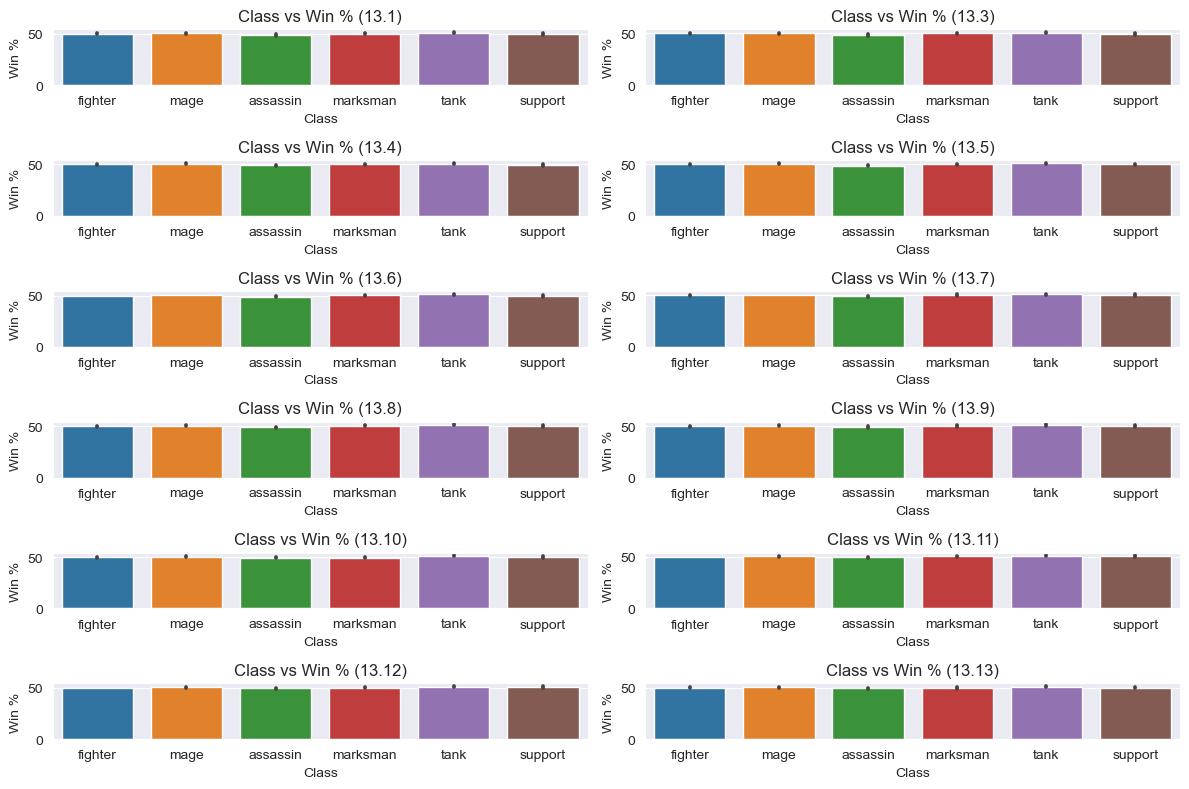

In [139]:
plot_list_bar(stats_df_list, 'Class', 'Win %')

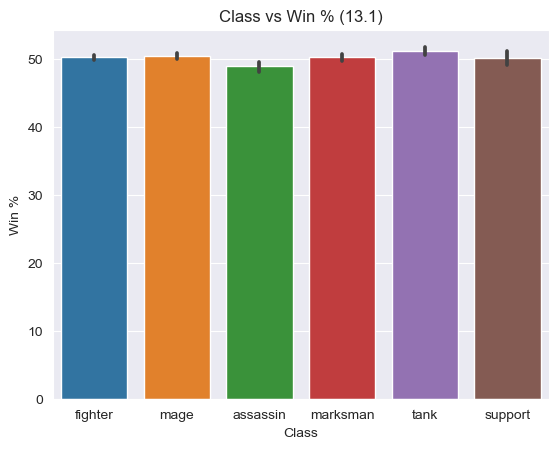

In [140]:
def plot_bar(df, category, score):
    """
    Plot bar chart
    :param df: A pandas dataframe
    :param category: The x-value
    :param score: The y-value
    :return: Nothing but plots the bar graph
    """
    #Plot a bar graph with the given parameters
    sns.barplot(data = df, x = category, y = score)
    plt.title(f"{category} vs {score} ({df['Patch'][1]})")
    
plot_bar(stats_1_df, 'Class', 'Win %')

Even though plotting all the bar graphs together may make them look like they all have the same win %, the reality is that there are small differences in it. While Score has similar deviations to win %, trend actually has noticeable variations when all the bars are lined together. The ideal scenario is actually for each group to have 50% win % because that would mean the game is perfectly balanced.

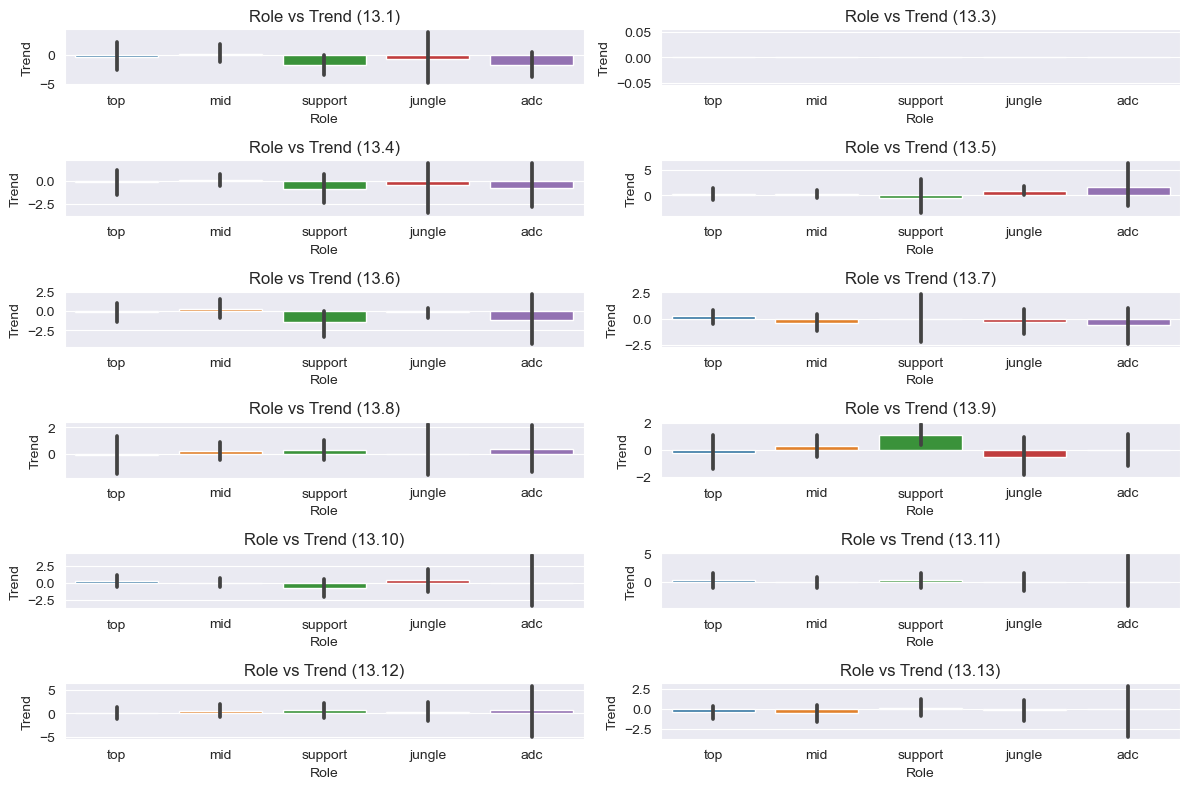

In [141]:
plot_list_bar(stats_df_list, 'Role', 'Trend')

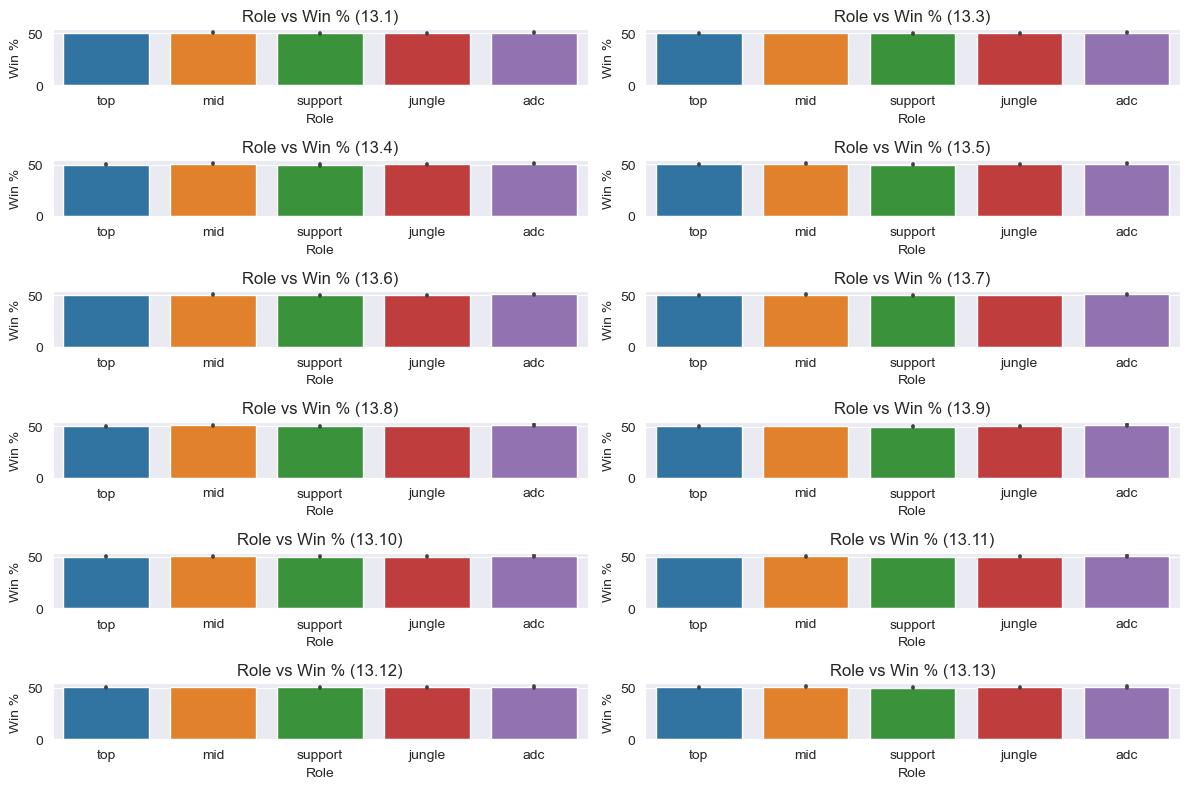

In [142]:
plot_list_bar(stats_df_list, 'Role', 'Win %')

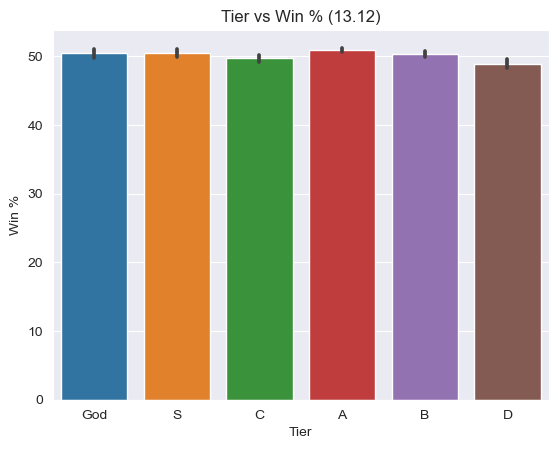

In [143]:
plot_bar(stats_12_df, 'Tier', 'Win %')

With these bar graphs, we can see which roles or classes are the strongest based on the data given. We can use this data later on to help us make predictions, but we can also just use it at face-value to see what types of champions players should use.

___Creating models___

In [144]:
def training_class(df):
    """
    :param df: A pandas dataframe
    :print: The average RMSE of the model's prediction for Class and Win % and cross validation scores for the given dataset
    """
    df = df.copy()
    df = df.drop(columns=['Name', 'Tier', 'Role'])

    #Data Processing
    #Convert categorical variables to numerical representations
    label_encoder = LabelEncoder()
    df['Class'] = label_encoder.fit_transform(df['Class'])

    #Create training and testing sets
    X = df.drop('Win %', axis=1)
    y = df['Win %']

    #Model Training
    model = LinearRegression()
    model.fit(X, y)

    loo = LeaveOneOut()
    #Empty list to store rmse values
    rmse_scores = []

    #Map class numerical labels to class names
    class_names = {0: 'assassin', 1: 'fighter', 2: 'mage', 3: 'marksman', 4: 'support', 5: 'tank'}

    #Plot predicted Win % per class
    #Get only unique classes
    classes = sorted(df['Class'].unique())
    num_classes = len(classes)
    plt.figure(figsize=(10, 8))

    for i, clas in enumerate(classes, start=1):
        plt.subplot(2, num_classes//2, i)
        class_df = df[df['Class'] == clas]
        #Get indices of rows corresponding to the current class
        class_indices = class_df.index  

        #Cross-validation for the current class
        class_rmse_scores = np.sqrt(-cross_val_score(model, X.loc[class_indices], y.loc[class_indices], cv=loo, scoring='neg_mean_squared_error'))

        #Plot the predicted Win % vs Actual Win % for the current class
        plt.scatter(class_df['Win %'], model.predict(X.loc[class_indices]), color='blue')
        plt.plot([class_df['Win %'].min(), class_df['Win %'].max()],
                 [class_df['Win %'].min(), class_df['Win %'].max()],
                 linestyle='--', color='red')
        plt.title(class_names[clas])

        #Calculate and print RMSE for the current class
        class_rmse = class_rmse_scores.mean()
        rmse_scores.append(class_rmse)
        print(f"RMSE for {class_names[clas]}: {class_rmse}")

        plt.xlabel('Actual Win %')
        plt.ylabel('Predicted Win %')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

The Root Mean Square Error is a measurement of how accurate the predicted linear regression line is to the actual data. The RMSE values for the following example are farily high, indicating a weak correlation. In further linear regression models, you can see with the examples provided that the RMSE values are change depending on the category and data frame used to make the model.

RMSE for assassin: 0.8107659010937976
RMSE for fighter: 0.8653651658223517
RMSE for mage: 0.8432784687917051
RMSE for marksman: 1.2070267227769609
RMSE for support: 0.9020833669876815
RMSE for tank: 0.8583730481272653


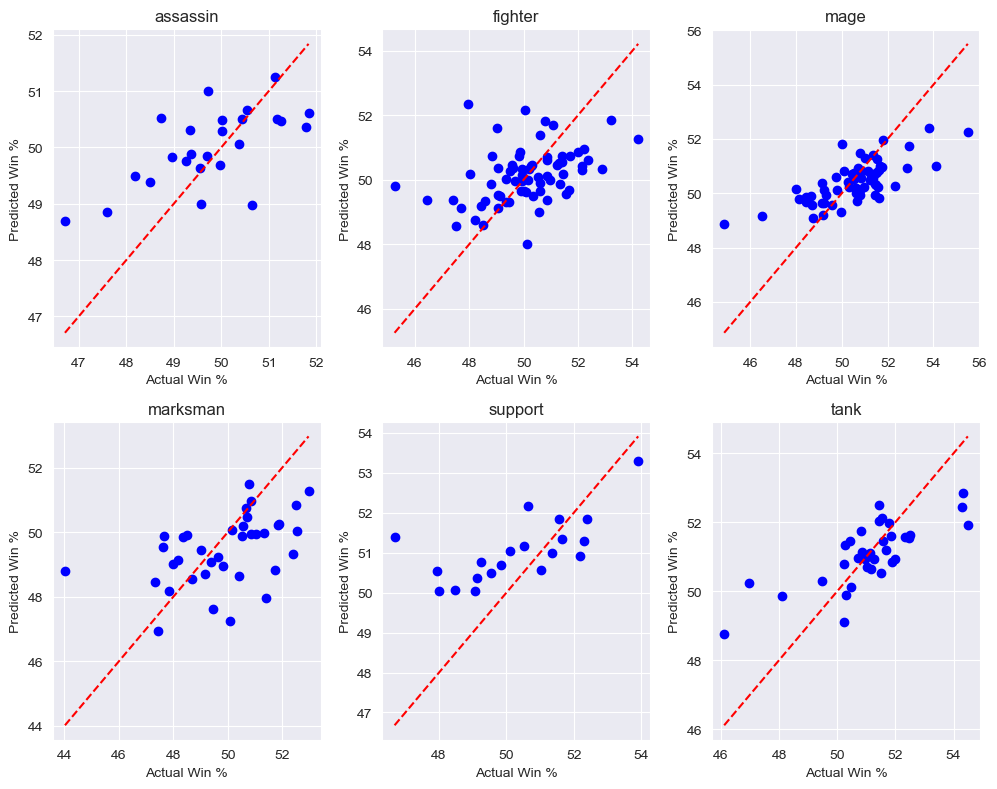

In [145]:
training_class(stats_13_df)

RMSE for assassin: 0.9356259797082954
RMSE for fighter: 0.940815951388693
RMSE for mage: 1.0470243293678934
RMSE for marksman: 1.127288302188346
RMSE for support: 1.0551302317143227
RMSE for tank: 0.9118516871873205


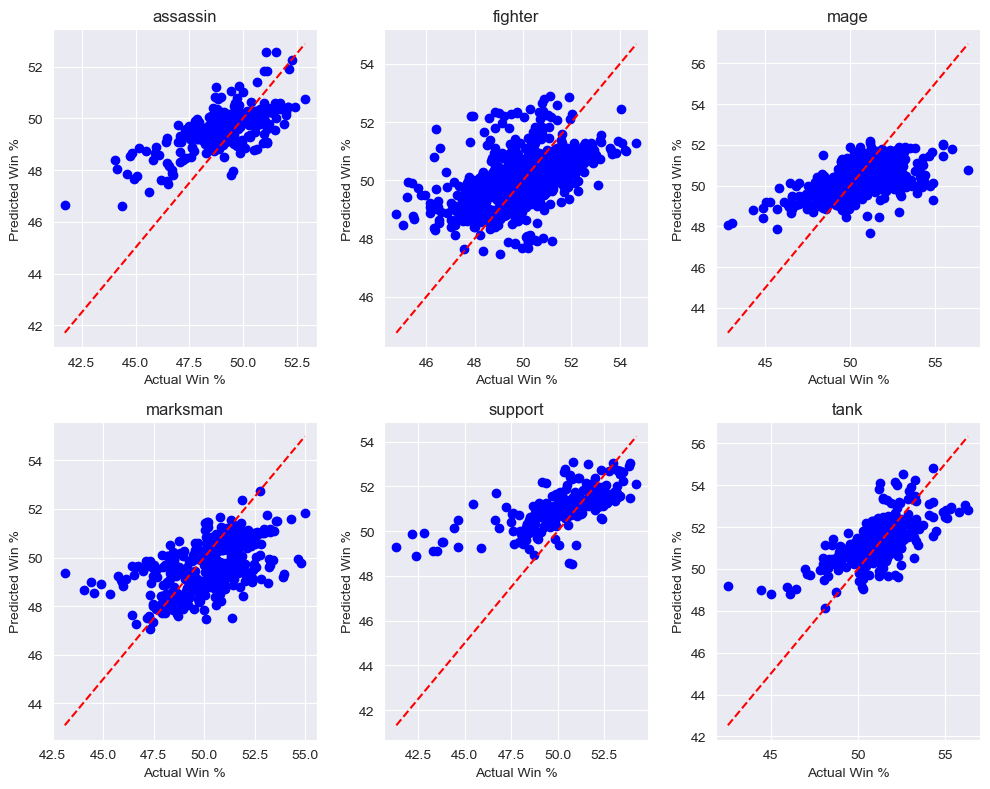

In [146]:
training_class(combined_stats_df)

In [147]:
def training_role(df):
    """
    :param df: A pandas dataframe
    :print: The average RMSE of the model's prediction for Tier and Win % and cross validation scores for the given dataset
    """
    df = df.copy()
    df = df.drop(columns=['Name', 'Class', 'Tier'])

    #Data Processing
    #Convert categorical variables to numerical representations
    label_encoder = LabelEncoder()
    df['Role'] = label_encoder.fit_transform(df['Role'])

    #Create training and testing sets
    X = df.drop('Win %', axis=1)
    y = df['Win %']

    #Model Training
    model = LinearRegression()
    model.fit(X, y)
    
    loo = LeaveOneOut()
    rmse_scores = []

    #Map role numerical labels to role names
    role_names = {0: 'top', 1: 'jungle', 2: 'mid', 3: 'adc', 4: 'support'}

    #Plot the predicted Win % per Role
    #Get only unique roles
    roles = sorted(df['Role'].unique()) 
    num_roles = len(roles)
    #Calculate the number of rows required for subplots
    num_rows = num_roles // 2 + num_roles % 2

    plt.figure(figsize=(10, 8))

    for i, role in enumerate(roles, start=1):
        plt.subplot(num_rows, 2, i)
        role_df = df[df['Role'] == role]
        #Get indices of rows corresponding to the current role
        role_indices = role_df.index  

        #Cross-validation for the current role
        role_rmse_scores = np.sqrt(-cross_val_score(model, X.loc[role_indices], y.loc[role_indices], cv=loo, scoring='neg_mean_squared_error'))

        #Plot predicted Win % vs Actual Win % for the current role
        plt.scatter(role_df['Win %'], model.predict(X.loc[role_indices]), color='blue')
        plt.plot([role_df['Win %'].min(), role_df['Win %'].max()],
                 [role_df['Win %'].min(), role_df['Win %'].max()],
                 linestyle='--', color='red')
        plt.title(role_names[role])

        #Calculate and print RMSE for the current role
        role_rmse = role_rmse_scores.mean()
        rmse_scores.append(role_rmse)
        print(f"RMSE for {role_names[role]}: {role_rmse}")

        plt.xlabel('Actual Win %')
        plt.ylabel('Predicted Win %')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

RMSE for top: 0.3341015083230953
RMSE for jungle: 0.39712951698229365
RMSE for mid: 0.5054494218013115
RMSE for adc: 0.4203634240299013
RMSE for support: 0.3509098638632473


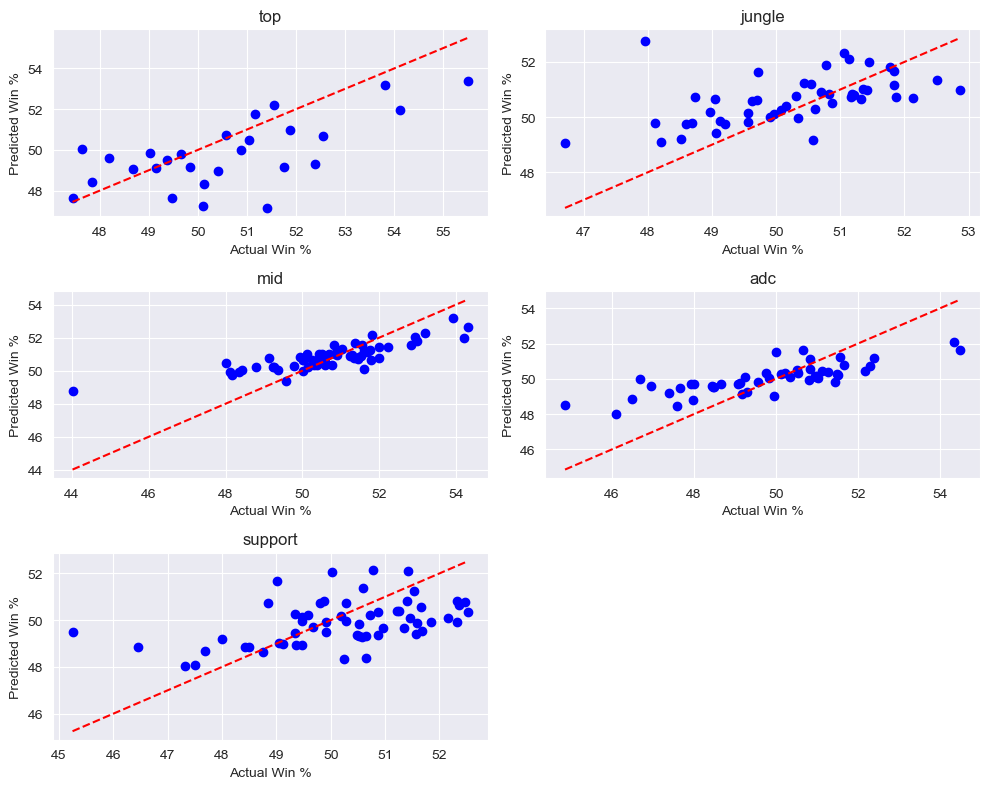

In [148]:
training_role(stats_13_df)

In [149]:
def training_tier(df):
    """
    :param df: A pandas dataframe
    :print: The average RMSE of the model's prediction for Tier and Win % and cross validation scores for the given dataset
    """
    df = df.copy()
    df = df.drop(columns=['Name', 'Class', 'Role'])

    #Data Processing
    #Convert categorical variables to numerical representations
    label_encoder = LabelEncoder()
    df['Tier'] = label_encoder.fit_transform(df['Tier'])

    X = df.drop('Win %', axis=1)
    y = df['Win %']

    #Model Training
    model = LinearRegression()
    model.fit(X, y)
    loo = LeaveOneOut()
    rmse_scores = []

    #Map tier numerical labels to the tier names
    tier_names = {0: 'God', 1: 'S', 2: 'A', 3: 'B', 4: 'C', 5: 'D'}

    #Plot the predicted Win % per tier
    #Get only unique tiers
    tiers = sorted(df['Tier'].unique())
    num_tiers = len(tiers)
    plt.figure(figsize=(10, 6))

    for i, tier in enumerate(tiers, start=1):
        plt.subplot(2, num_tiers//2, i)
        tier_df = df[df['Tier'] == tier]
        #Get indices of rows corresponding to the current tier
        tier_indices = tier_df.index  

        #Cross-validation for the current tier
        tier_rmse_scores = np.sqrt(-cross_val_score(model, X.loc[tier_indices], y.loc[tier_indices], cv=loo, scoring='neg_mean_squared_error'))

        #Plot the predicted Win % vs Actual Win % for the current tier
        plt.scatter(tier_df['Win %'], model.predict(X.loc[tier_indices]), color='blue')
        plt.plot([tier_df['Win %'].min(), tier_df['Win %'].max()],
                 [tier_df['Win %'].min(), tier_df['Win %'].max()],
                 linestyle='--', color='red')
        plt.title(f"{tier_names[tier]} tier")

        #Calculate and print RMSE for the current tier
        tier_rmse = tier_rmse_scores.mean()
        rmse_scores.append(tier_rmse)
        print(f"RMSE for {tier_names[tier]} tier: {tier_rmse}")

        plt.xlabel('Actual Win %')
        plt.ylabel('Predicted Win %')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

RMSE for God tier: 0.918634736304745
RMSE for S tier: 1.0595003539201349
RMSE for A tier: 1.3336209948688031
RMSE for B tier: 1.5410046826857025
RMSE for C tier: 1.3420109303792316
RMSE for D tier: 1.033525115704184


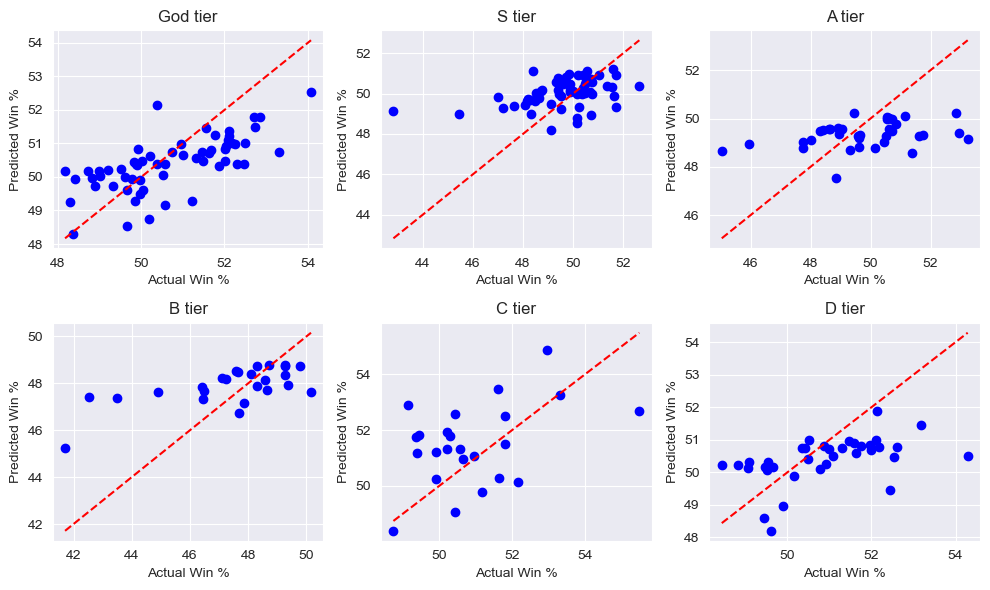

In [150]:
training_tier(stats_3_df)

In [151]:
def win_over_time(df, champion):
    """
    :param df: A pandas dataframe
    :param champion: A champion name
    :plot: a line plot of a champion's winrate over time
    """
    #Filter dataframe with the champion name
    champ_df = df[df['Name'].str.contains(champion)].copy()
    print(champ_df.head())
    #Plot
    sns.lineplot(data=champ_df, x='Patch', y='Win %')
    plt.title(f"{champion}'s Win Rate Over Time")

       Name    Class Role Tier  Score  Trend  Win %  Role %  Pick %  Ban %  \
0    Aatrox  fighter  top    S  57.63 -31.86  47.68   91.63    6.62  11.98   
244  Aatrox  fighter  top    A  53.65   0.00  48.17   92.75    5.14   6.60   
485  Aatrox  fighter  top    A  51.47  -2.38  47.27   92.53    4.70   5.57   
724  Aatrox  fighter  top    A  54.25   2.78  46.86   92.37    5.15   5.83   
970  Aatrox  fighter  top    A  53.42  -0.83  47.93   91.71    5.09   5.03   

      KDA Patch  
0    1.77  13.1  
244  1.85  13.3  
485  1.81  13.4  
724  1.78  13.5  
970  1.76  13.6  


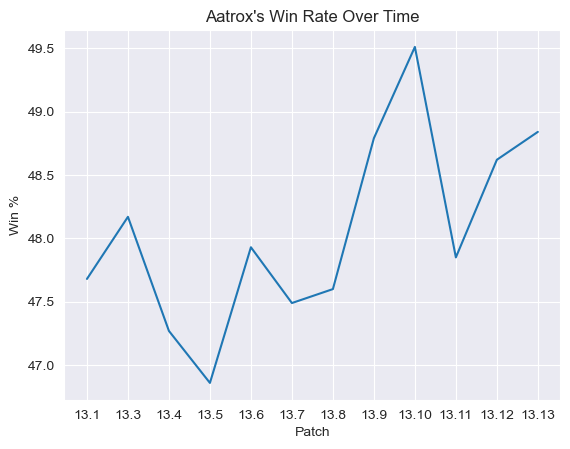

In [152]:
win_over_time(combined_stats_df, 'Aatrox')

The most obvious indicator of a champion's strength is their win %. If a champion has a consistently high win %, then the champion is consistently strong and vice versa. The graph above lets us look at a champion's win rate patch by patch which lets us analyze why that champion's win rate lowered or got raised.

In [153]:
def score_over_time(df, champion):
    """
    :param df: A pandas dataframe
    :param champion: A champion name
    :plot: a line plot of a champion's score over time
    """
    #Filter dataframe by the champion name
    champ_df = df[df['Name'].str.contains(champion)].copy()
    #Convert the catergory from string to numeric
    champ_df['Score'] = pd.to_numeric(champ_df['Score'], errors='coerce')
    #Plot
    sns.lineplot(data=champ_df, x='Patch', y='Score')
    plt.title(f"{champion}'s Score Over Time")

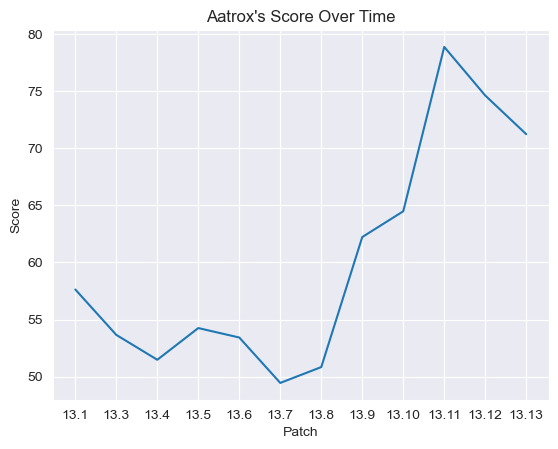

In [154]:
score_over_time(combined_stats_df, 'Aatrox')

The score of a champion is a good representation of how well a champion is doing. The higher the score, the better the champion is. Similarly to the win rate, the score gives indications of balance problems within the champion roster and shows the players who to play and the developers what to change.

In [155]:
def trend_over_time(df, champion):
    """
    :param df: A pandas dataframe
    :param champion: A champion name
    :plot: a line plot of a champion's trend over time
    """
    #Filter dataframe by champion name
    champ_df = df[df['Name'].str.contains(champion)].copy()
    #Convert the catergory from string to numeric
    champ_df['Trend'] = pd.to_numeric(champ_df['Trend'], errors='coerce')
    #Plot
    sns.lineplot(data=champ_df, x='Patch', y='Trend')
    plt.title(f"{champion}'s Trend Over Time")

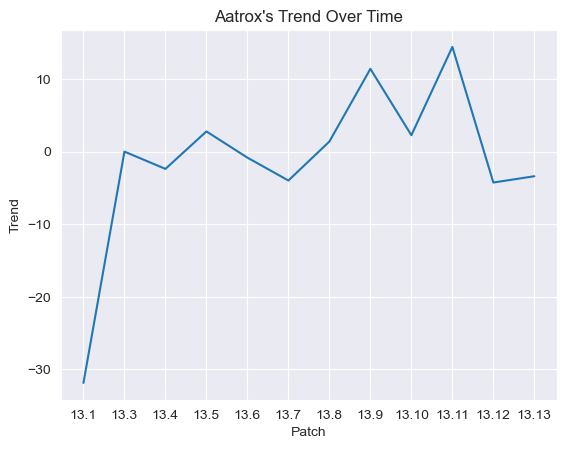

In [156]:
trend_over_time(combined_stats_df, 'Aatrox')

The trend of a champion shows the trend of a champion's score. We can think of the trend as the slope or the change in the score. With this we can predict how well a champion will do in the next patch.

In [157]:
def champ_presence(df, champion):
    """
    :param df: a pandas dataframe
    :param champion: A champion name
    :print: A bar graph of a champion's total presence (pick % + ban %) over time
    """
    #Filter dataframe by chosen champion
    champ_df = df[df['Name'].str.contains(champion, na=False)].copy()
    #Convert pick % and ban % to numeric
    champ_df['Pick %'] = pd.to_numeric(champ_df['Pick %'], errors='coerce')
    champ_df['Ban %'] = pd.to_numeric(champ_df['Ban %'], errors='coerce')
    #Create a new column in the dataframe
    champ_df['Total Presence'] = champ_df['Pick %'] + champ_df['Ban %']
    
    print(champ_df)
    
    sns.barplot(data=champ_df, x='Patch', y='Pick %', color='blue', label='Pick %')
    sns.barplot(data=champ_df, x='Patch', y='Ban %', color='red', label='Ban %', bottom=champ_df['Pick %'])
    plt.legend()
    plt.title(f"{champion}'s Total Presence Over Time")
    plt.ylabel("Presence (%)")

        Name    Class Role Tier  Score  Trend  Win %  Role %  Pick %  Ban %  \
0     Aatrox  fighter  top    S  57.63 -31.86  47.68   91.63    6.62  11.98   
244   Aatrox  fighter  top    A  53.65   0.00  48.17   92.75    5.14   6.60   
485   Aatrox  fighter  top    A  51.47  -2.38  47.27   92.53    4.70   5.57   
724   Aatrox  fighter  top    A  54.25   2.78  46.86   92.37    5.15   5.83   
970   Aatrox  fighter  top    A  53.42  -0.83  47.93   91.71    5.09   5.03   
1213  Aatrox  fighter  top    A  49.44  -3.98  47.49   91.83    4.55   4.57   
1453  Aatrox  fighter  top    A  50.83   1.39  47.60   91.15    4.35   4.33   
1695  Aatrox  fighter  top    S  62.23  11.40  48.79   92.41    5.48   4.94   
1940  Aatrox  fighter  top    S  64.49   2.26  49.51   92.23    5.55   4.48   
2184  Aatrox  fighter  top  God  78.90  14.42  47.85   91.85    7.96   5.00   
2429  Aatrox  fighter  top  God  74.64  -4.26  48.62   92.39    7.48   5.38   
2680  Aatrox  fighter  top  God  71.25  -3.39  48.84

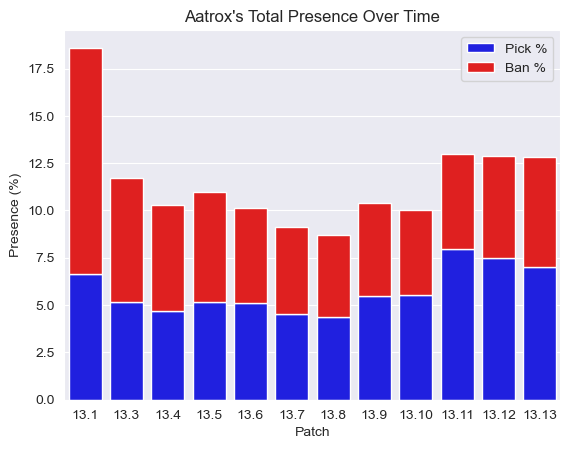

In [158]:
champ_presence(combined_stats_df, 'Aatrox')

Win % isn't the only metric to see a champion's strength. A champion's total presence (their pick % + ban %) can give insight to how strong a champion is. Generally if a champion has a high presence, then they will be stronger because players will want to pick stronger champions and also ban champions that are stronger than the ones they want to play.

In [159]:
def predict_win(df1, champ_class, role, tier):
    """
    :param df1: A pandas DataFrame
    :param champ_class: The champion class
    :param role: The champion role
    :param tier: The champion tier
    :return: prints out the predicted winrate of a champion based on the given parameters (class, role, and tier)
    """
    df = df1.copy()
    label_encoder = LabelEncoder()
    #Convert strings into numerical values
    df['Class'] = label_encoder.fit_transform(df['Class'])
    df['Role'] = label_encoder.fit_transform(df['Role'])
    df['Tier'] = label_encoder.fit_transform(df['Tier'])

    encoded_class = label_encoder.fit_transform([champ_class])[0]
    encoded_role = label_encoder.fit_transform([role])[0]
    encoded_tier = label_encoder.fit_transform([tier])[0]

    X = df[['Class', 'Role', 'Tier']]
    y = df['Win %']
    
    #Create training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    #Model Evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    #Predict winrate based on the given categories
    new_champion_data = pd.DataFrame([[encoded_class, encoded_role, encoded_tier]], columns=['Class', 'Role', 'Tier'])
    predicted_win_rate = model.predict(new_champion_data)
    print(f"Predicted Win Rate for the new champion: {predicted_win_rate}")


    #Select columns and copy the DataFrame
    category_df = df1[['Class', 'Role', 'Tier', 'Win %']].copy()
    
    #Filter rows based on conditions
    category_df = category_df[(category_df['Class'] == champ_class) &
                              (category_df['Role'] == role) &
                              (category_df['Tier'] == tier)]
    #Group by 'Class', 'Role', and 'Tier' and calculate the mean
    category_df = category_df.groupby(['Class', 'Role', 'Tier']).mean()
    #Print the average win rate
    print(f"Average Win Rate for the new champion: {category_df['Win %'].iloc[0]}")

In [160]:
predict_win(combined_stats_df, 'fighter', 'top', 'S')

Mean Squared Error: 3.1436088378987566
R-squared Score: 0.0292734545708484
Predicted Win Rate for the new champion: [50.11918923]
Average Win Rate for the new champion: 50.04186046511629


The above code block is a function to print out the predicted and average winrate of a champion based on the champion's class, role, and tier. It also prints out the Mean Squared Error and R-squared Error to help identify whether the model used was accurate or not. In the example used, the predicted win rate was 50.11% while the actual average win rate was 50.04%. This means there was a 0.155% error between the actual and predicted values. I also showed the Mean squared error and the R-squared error which both evaluate the performance of the model I made. Since both values are very low, we can say that this model is accurate.

In [161]:
def predict_win1(df1, champion):
    """
    
    :param df1: A pandas Dataframe
    :param champion: The champion name
    :return: prints out the predicted winrate of the given champion
    """
    #Copy the DataFrame to avoid modifying the original
    df = combined_stats_df.copy()
    patch = pd.to_numeric(df1['Patch'][0])
    df['Patch'] = pd.to_numeric(df['Patch'], errors='coerce')

    #Filter the DataFrame to remove rows with patch value greater than 'patch'
    df = df[df['Patch'] <= patch]

    X = df[['Score', 'Trend']]
    y = df['Win %']

    #Create training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Training model
    model = LinearRegression()
    model.fit(X_train, y_train)

    #Model Evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    #Predict winrate for the given champion
    champion_data = df[df['Name'] == champion][['Score', 'Trend']]
    if not champion_data.empty:
        predicted_win_rate = model.predict(champion_data)
        print(f"Predicted Win Rate for {champion}: {predicted_win_rate[0]}")
    else:
        print(f"No data available for {champion}.")

In [162]:
predict_win1(stats_12_df, 'Aatrox')

Mean Squared Error: 2.4093125831484525
R-squared Score: 0.09035238643122745
Predicted Win Rate for Aatrox: 48.91463945411061


The above code block is a function to print out the predicted winrate of a champion next patch based on the champion's previous winrate, score, and trend. The example provided predicted a 48.91% winrate for Aatrox in patch 13.13 and the actual winrate for Aatrox in patch 13.13 was 48.84% as shown in the code dell below. With a .07% difference, there was a .153% error. The Mean squared error and R-squared error were also small, this model is also accurate.

In [163]:
win_rate = stats_13_df.loc[stats_13_df['Name'] == 'Aatrox', 'Win %']
print(win_rate)

0    48.84
Name: Win %, dtype: float64


Overall this project was largely a success. I was able to achieve my goal in predicting win rates for champions based on the class, role, and tier and also analyzed other data points as well. I was able to find a data set I was interested in, clean the data, analyze it, create visualizations, and present it.